# Maryum Fasih
# 22i-0756
# H

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Create the Neural Network Model using nn.module

In [2]:
# Model to classify types of Irises
# there are 4 inputs and there are 3 outputs

class IrisClassifier(nn.Module):
    def __init__(self, input_dim=4, layer1_units=8, layer2_units=9, output_dim=3):
        super().__init__()
        # Defining the layers of the network
        self.hidden_layer1 = nn.Linear(input_dim, layer1_units)
        self.hidden_layer2 = nn.Linear(layer1_units, layer2_units)
        self.output_layer = nn.Linear(layer2_units, output_dim)

    def forward(self, x):
        # Applying ReLU activation on the hidden layers
        x = F.relu(self.hidden_layer1(x))
        x = F.relu(self.hidden_layer2(x))
        # Output layer computation
        x = self.output_layer(x)
        return x

In [3]:
torch.manual_seed(41)

iris_model = IrisClassifier()

# Data Preprocessing
Split the dataset, extract the features and normalize if needed, and convert the labels into tensors using LongTensor()

In [4]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Split the dataset into features (X) and target labels (y)
X_data = df.drop('species', axis=1).values
y_data = df['species'].values

# Convert string labels to numeric using LabelEncoder
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)  # Converts labels to 0,1,2

# Normalize the features to have mean 0 and variance 1
feature_scaler = StandardScaler()
X_data = feature_scaler.fit_transform(X_data)

# Convert to PyTorch tensors
X_data = torch.tensor(X_data, dtype=torch.float32)
y_data = torch.tensor(y_data, dtype=torch.long)  # Long type for CrossEntropyLoss

# Split data into training and testing sets (80% train, 20% test)
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


Set the Loss Function and optimizer

In [7]:
iris_classifier_model = IrisClassifier()

# Define the loss function (CrossEntropy) and optimizer (Adam)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(iris_classifier_model.parameters(), lr=0.01)

# Train the model

In [8]:
epochs = 100
training_loss = []

for epoch in range(epochs):
    iris_classifier_model.train()

    # Perform forward pass to get model predictions
    predictions = iris_classifier_model(X_train_data)
    
    # Calculate the loss using the true labels and predictions
    loss_value = loss_fn(predictions, y_train_data)
    training_loss.append(loss_value.item())

    # Zero out gradients to prevent accumulation from previous steps
    optimizer.zero_grad()
    
    # Perform backward pass to compute gradients
    loss_value.backward()
    
    # Update model weights based on gradients
    optimizer.step()
    
    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Loss: {loss_value.item():.4f}")

Epoch 0 - Loss: 1.1310
Epoch 10 - Loss: 0.8256
Epoch 20 - Loss: 0.4981
Epoch 30 - Loss: 0.3507
Epoch 40 - Loss: 0.2545
Epoch 50 - Loss: 0.1746
Epoch 60 - Loss: 0.1170
Epoch 70 - Loss: 0.0845
Epoch 80 - Loss: 0.0681
Epoch 90 - Loss: 0.0599


# Graph the losses per epoch

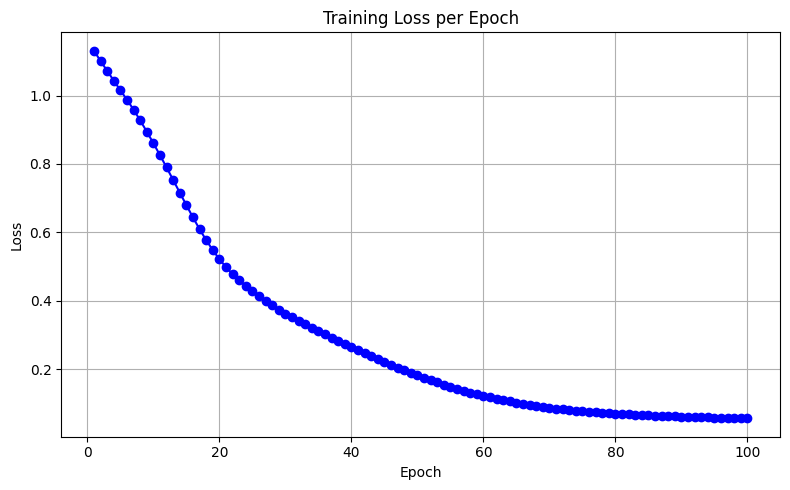

In [9]:
# Plotting the training loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(training_loss) + 1), training_loss, marker='o', color='blue')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


# Test the model on the test set

In [10]:
# Evaluate the Model on the Test Data (validate the model on test set)
iris_classifier_model.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Disable gradient calculation for testing
    y_test_predictions = iris_classifier_model(X_test_data)

# Get predicted classes
predicted_classes = torch.argmax(y_test_predictions, dim=1)

# Calculate accuracy
correct_predictions = (predicted_classes == y_test_data).sum().item()
test_accuracy = correct_predictions / y_test_data.size(0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 100.00%


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Convert tensors to numpy arrays
y_test_numpy = y_test_data.numpy()
predicted_classes_numpy = predicted_classes.numpy()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_numpy, predicted_classes_numpy)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test_numpy, predicted_classes_numpy, target_names=encoder.classes_))


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

